In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("Unemployment in India.csv")

In [3]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
df.dropna(inplace=True)

In [14]:
df.columns=["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Area"]

In [17]:
avg=df.groupby("States")["Estimated Unemployment Rate"].mean()
sorted_values=avg.sort_values(ascending=False)
top=sorted_values.head(5)
print(top)

States
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name: Estimated Unemployment Rate, dtype: float64


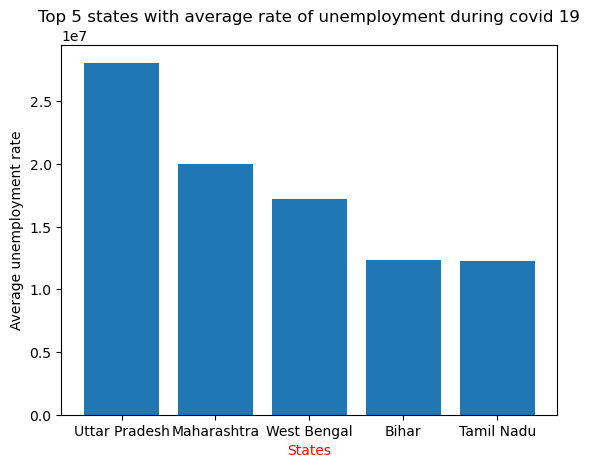

In [22]:
plt.bar(top.index,top.values)
plt.title("Top 5 states with average rate of unemployment during covid 19")
plt.xlabel("States",color="red")
plt.ylabel("Average unemployment rate")
plt.show()

In [20]:
avg=df.groupby("States")["Estimated Employed"].mean()
sorted=avg.sort_values(ascending=False)
top=sorted.head(5)
print(top)

States
Uttar Pradesh    2.809483e+07
Maharashtra      1.999020e+07
West Bengal      1.719854e+07
Bihar            1.236619e+07
Tamil Nadu       1.226955e+07
Name: Estimated Employed, dtype: float64


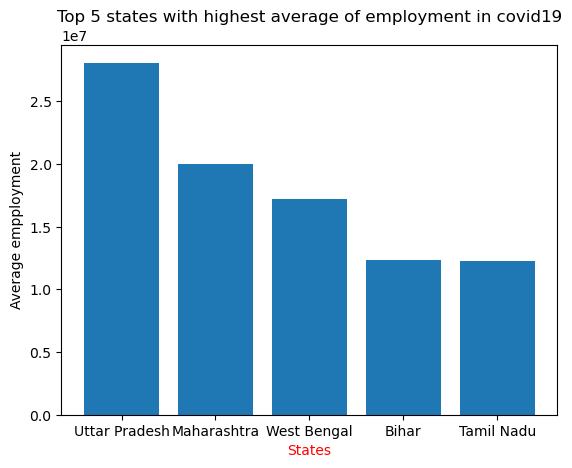

In [21]:
plt.bar(top.index,top.values)
plt.title("Top 5 states with highest average of employment in covid19")
plt.xlabel("States",color="red")
plt.ylabel("Average empployment")
plt.show()

In [23]:
area_wise=df.groupby("Area")["Estimated Unemployment Rate"].mean()
area_wise

Area
Rural    10.324791
Urban    13.166614
Name: Estimated Unemployment Rate, dtype: float64

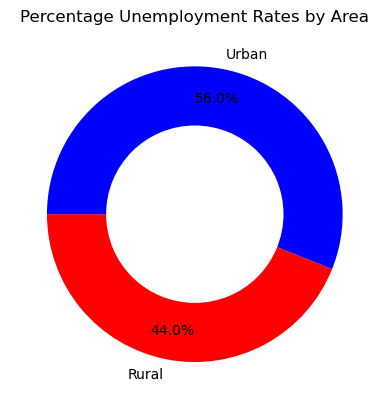

In [29]:
colors=['red','blue']
area_wise={'Rural':10.324791,
          'Urban':13.166614}
fig,ax = plt.subplots()
ax.pie(area_wise.values(), labels=area_wise.keys(), colors=colors, autopct='%1.1f%%', startangle=180, pctdistance=0.8, radius=1)
ax.pie([100], radius=0.6, colors=['white'])
ax.set_title('Percentage Unemployment Rates by Area')
plt.show()
     